In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import g3py as g3

g3.style_big_seaborn()
g3.style_widget()

# Gaussian Processes

In [2]:
def test_gp():
    with g3.Model() as model:
        gp = g3.GaussianProcess(x, g3.Bias(), g3.SE(x_obs) ,hidden=y)
        gp.describe(name_data,'time','measure','GP')
        gp.observed(x_obs,y_obs)

    params = gp.find_MAP(points=2, plot=False)
    gp.plot(params, title='GP '+name_data, samples=5)
    
    gp.save_model('models/'+name_data+'_GP.g3', params)
    g3.save_plot('images/05-'+name_data+'_GP.pdf')
    g3.show()

# Transformed Gaussian Processes

In [3]:
def test_tgp():
    with g3.Model() as model: 
        tgp = g3.TransformedGaussianProcess(x, g3.Bias(), g3.SE(x_obs), g3.BoxCoxShifted(y_obs),hidden=y)
        tgp.describe(name_data,'time','measure','BoxCoxGP')
        tgp.observed(x_obs,y_obs)

    params = tgp.find_MAP(points=2, plot=False)
    tgp.plot(params,title='BoxGP '+name_data, samples=5)

    tgp.save_model('models/'+name_data+'_TGP.g3', params)
    g3.save_plot('images/05-'+name_data+'_TGP.pdf')
    g3.show()

# Experiments

1. Economic
    * [EURUSD_GP.pdf](images/05-EURUSD_GP.pdf)
    * [EURUSD_TGP.pdf](images/05-EURUSD_TGP.pdf)
2. Biologic
    * [heart_GP.pdf](images/05-heart_GP.pdf)
    * [heart_TGP.pdf](images/05-heart_TGP.pdf)
3. Social
    * [engel_income_GP.pdf](images/05-engel_income_GP.pdf)
    * [engel_income_TGP.pdf](images/05-engel_income_TGP.pdf)
4. Astronomy
    * [sunspots_GP.pdf](images/05-sunspots_GP.pdf)
    * [sunspots_TGP.pdf](images/05-sunspots_TGP.pdf)
5. Hydrology
    * [mau_GP.pdf](images/05-mau_GP.pdf)
    * [mau_TGP.pdf](images/05-mau_TGP.pdf)
    * [bmau_GP.pdf](images/05-bmau_GP.pdf)
    * [bmau_TGP.pdf](images/05-bmau_TGP.pdf)
    * [cip_GP.pdf](images/05-cip_GP.pdf)
    * [cip_TGP.pdf](images/05-cip_TGP.pdf)
6. Atmospherics
    * [MaunaLoaC02_GP.pdf](images/05-MaunaLoaC02_GP.pdf)
    * [MaunaLoaC02_TGP.pdf](images/05-MaunaLoaC02_TGP.pdf)

# Economic Serie: EURUSD

Total: 721 | Obs: 72 (9.986130374479888%)
Space Dimensions:  (721, 1)
Definition OK
Compilation OK
Starting function value (-logp): -75.4514

start_bfgs
         Current function value: -180.978516
         Iterations: 16
         Function evaluations: 76
         Gradient evaluations: 65

start_powell
Optimization terminated successfully.
         Current function value: -180.978546
         Iterations: 5
         Function evaluations: 331
Saved model models/EURUSD_GP.g3


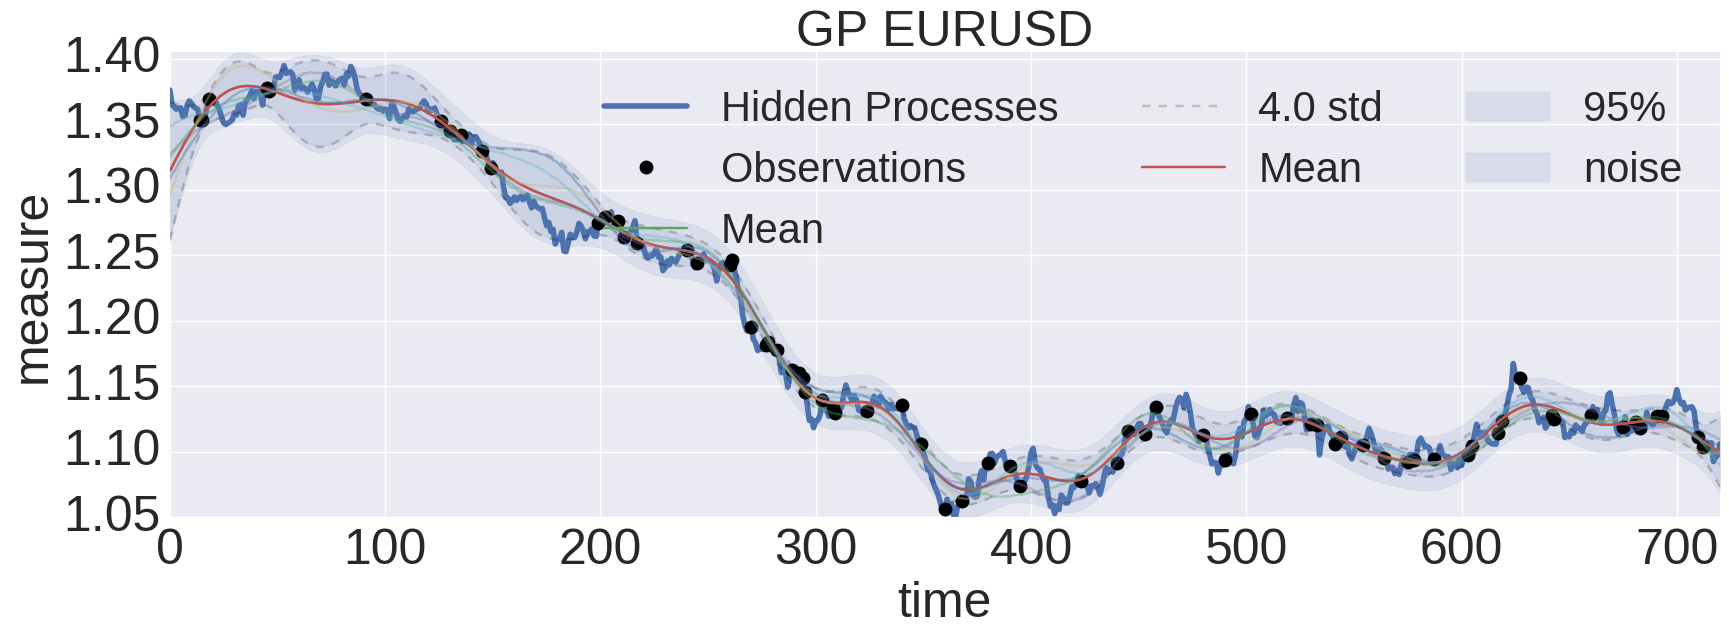

Space Dimensions:  (721, 1)
Definition OK
Compilation OK
Starting function value (-logp): -71.9649

start_bfgs
         Current function value: -187.137909
         Iterations: 25
         Function evaluations: 111
         Gradient evaluations: 100

start_powell
Optimization terminated successfully.
         Current function value: -180.932861
         Iterations: 4
         Function evaluations: 369
Saved model models/EURUSD_TGP.g3


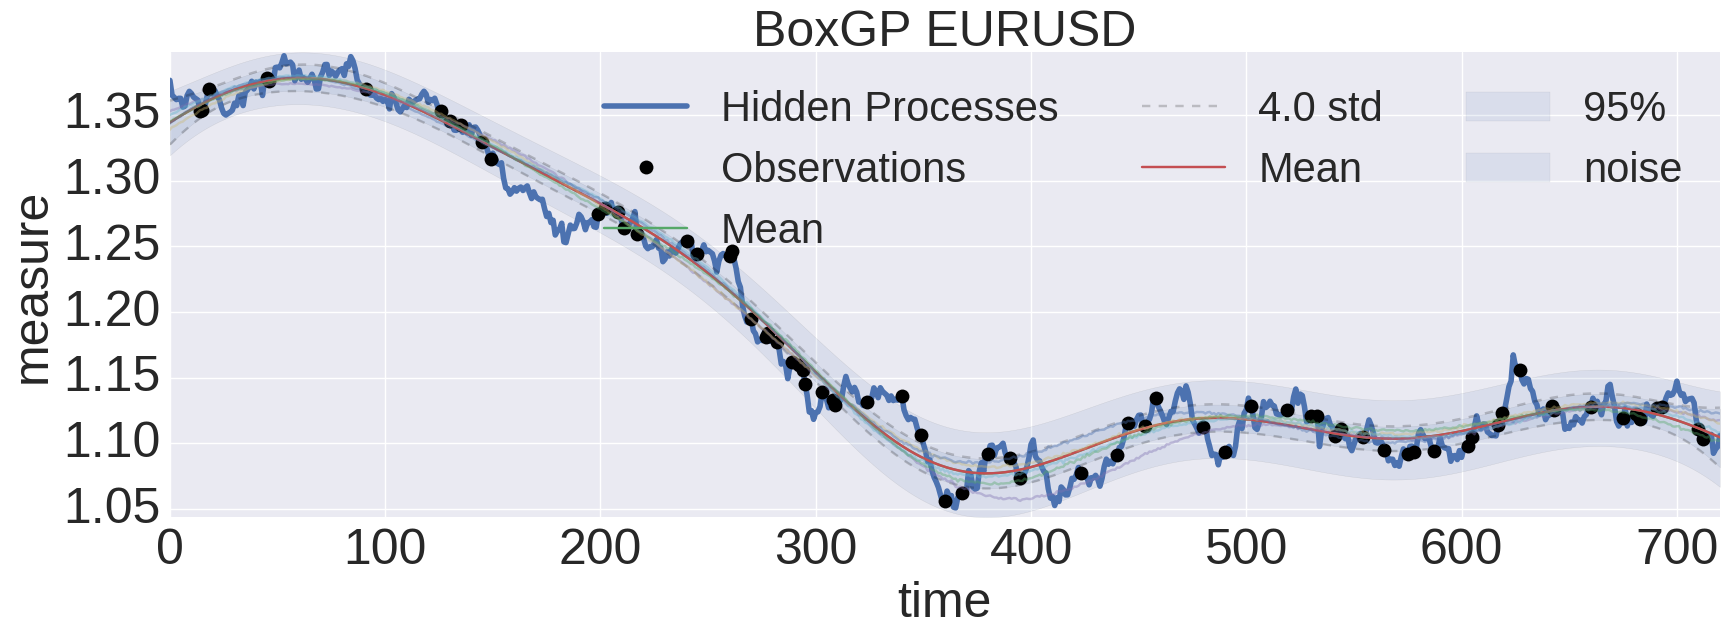

In [4]:
name_data = 'EURUSD'
y = np.loadtxt('data/EURUSD-1401-1510.txt')
x = np.arange(len(y))
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.1)
test_gp()
test_tgp()

# Biologic Serie: Heart

Total: 1800 | Obs: 54 (3.0%)
Space Dimensions:  (1800, 1)
Definition OK
Compilation OK
Starting function value (-logp): 164.274

start_bfgs
         Current function value: 151.098694
         Iterations: 16
         Function evaluations: 97
         Gradient evaluations: 85

start_powell
Optimization terminated successfully.
         Current function value: 151.098785
         Iterations: 9
         Function evaluations: 497
Saved model models/heart_GP.g3


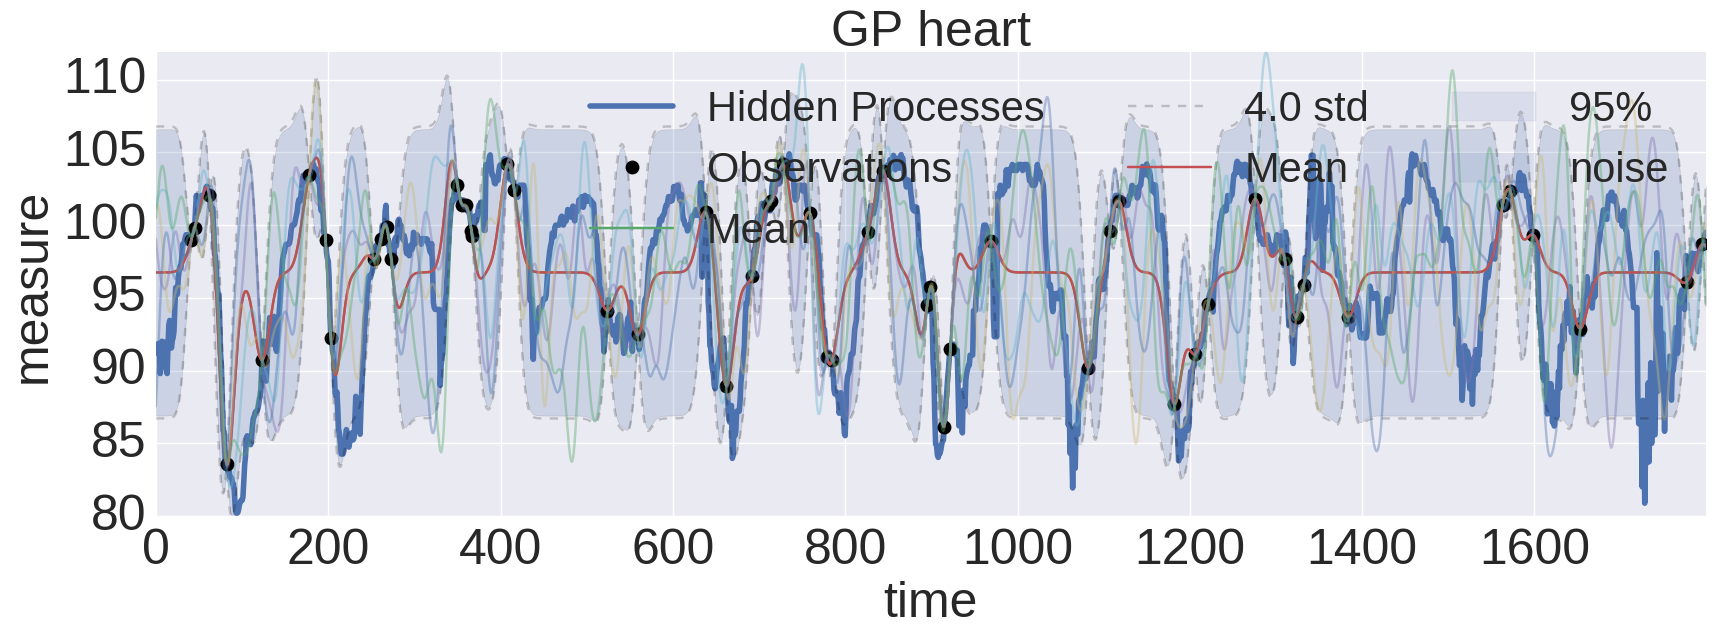

Space Dimensions:  (1800, 1)
Definition OK
Compilation OK
Starting function value (-logp): 1997.45

start_bfgs
         Current function value: 160.729645
         Iterations: 94
         Function evaluations: 208
         Gradient evaluations: 196

start_powell
Optimization terminated successfully.
         Current function value: 151.174500
         Iterations: 8
         Function evaluations: 829
Saved model models/heart_TGP.g3


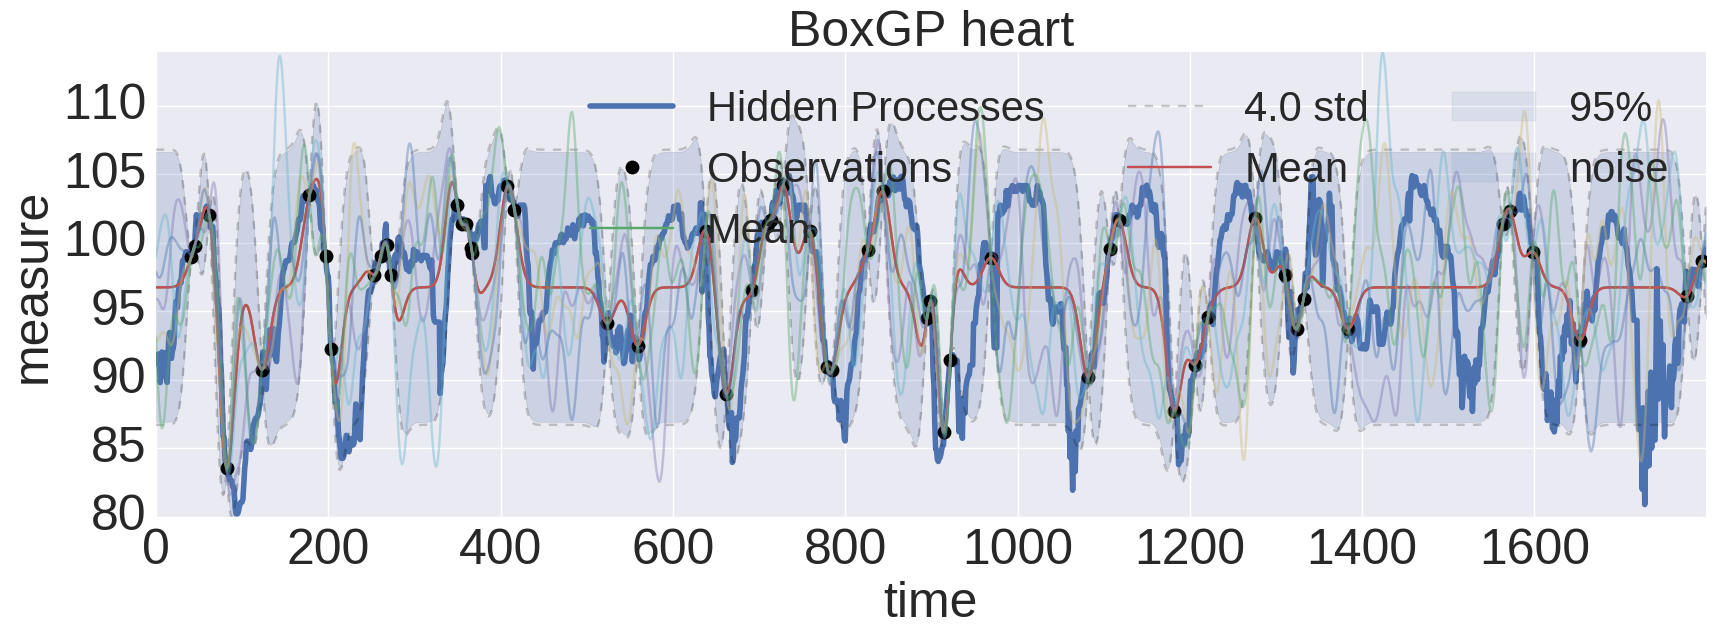

In [5]:
name_data = 'heart'
y = np.loadtxt('data/hr2.txt')
x = np.arange(len(y))
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.03)
test_gp()
test_tgp()

# Social Serie: Engel Income

::

    Number of observations: 235
    Number of variables: 2
    Variable name definitions:
        income - annual household income (Belgian francs)
        foodexp - annual household food expenditure (Belgian francs)

Total: 235 | Obs: 47 (20.0%)
Space Dimensions:  (235, 1)
Definition OK
Compilation OK
Starting function value (-logp): 353.679

start_bfgs
         Current function value: 348.860352
         Iterations: 24
         Function evaluations: 103
         Gradient evaluations: 92

start_powell
Optimization terminated successfully.
         Current function value: 348.863892
         Iterations: 3
         Function evaluations: 165
Saved model models/engel_income_GP.g3


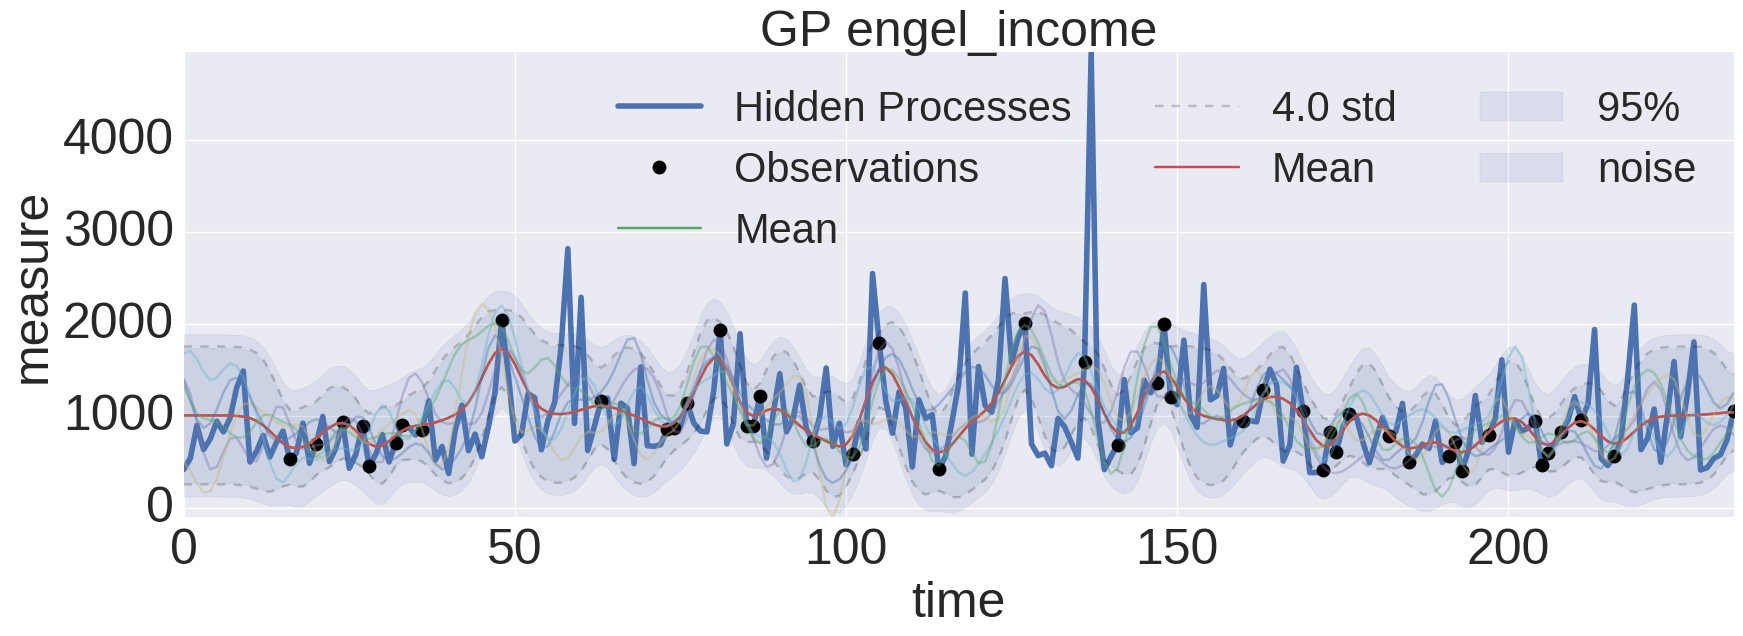

Space Dimensions:  (235, 1)
Definition OK
Compilation OK
Starting function value (-logp): 360.366

start_bfgs
         Current function value: 348.358612
         Iterations: 11
         Function evaluations: 81
         Gradient evaluations: 69

start_powell
Optimization terminated successfully.
         Current function value: 348.698669
         Iterations: 3
         Function evaluations: 267
Saved model models/engel_income_TGP.g3


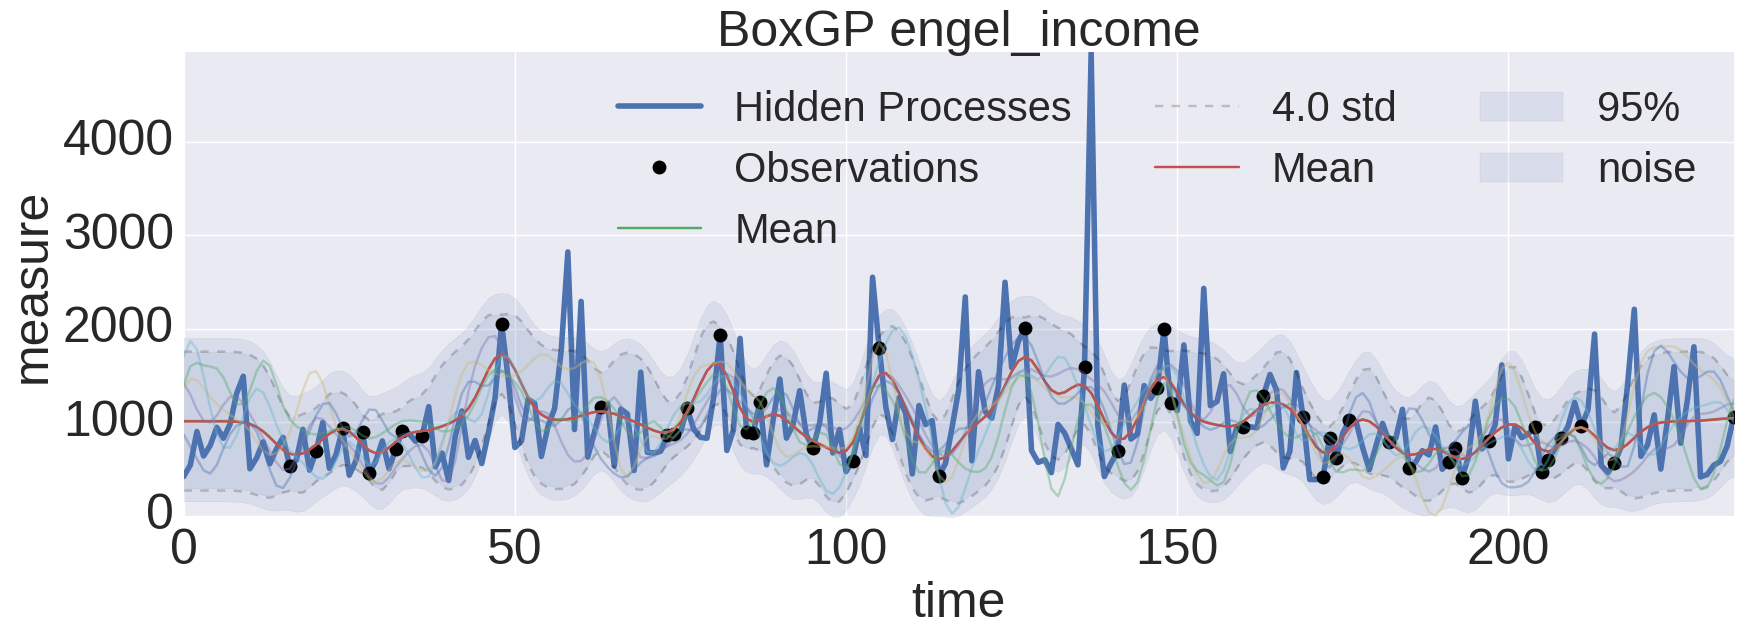

In [6]:
import statsmodels.api as sm
data = sm.datasets.engel.load_pandas().data['income']
print(sm.datasets.engel.NOTE)
name_data = 'engel_income'
x, y = data.index.values, data.values
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.2)
test_gp()
test_tgp()

# Astronomic Serie: Sunspots

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 77 (24.919093851132686%)
Space Dimensions:  (309, 1)
Definition OK
Compilation OK
Starting function value (-logp): 398.258

start_bfgs
         Current function value: 374.710693
         Iterations: 32
         Function evaluations: 104
         Gradient evaluations: 92

start_powell
Optimization terminated successfully.
         Current function value: 375.045471
         Iterations: 4
         Function evaluations: 259
Saved model models/sunspots_GP.g3


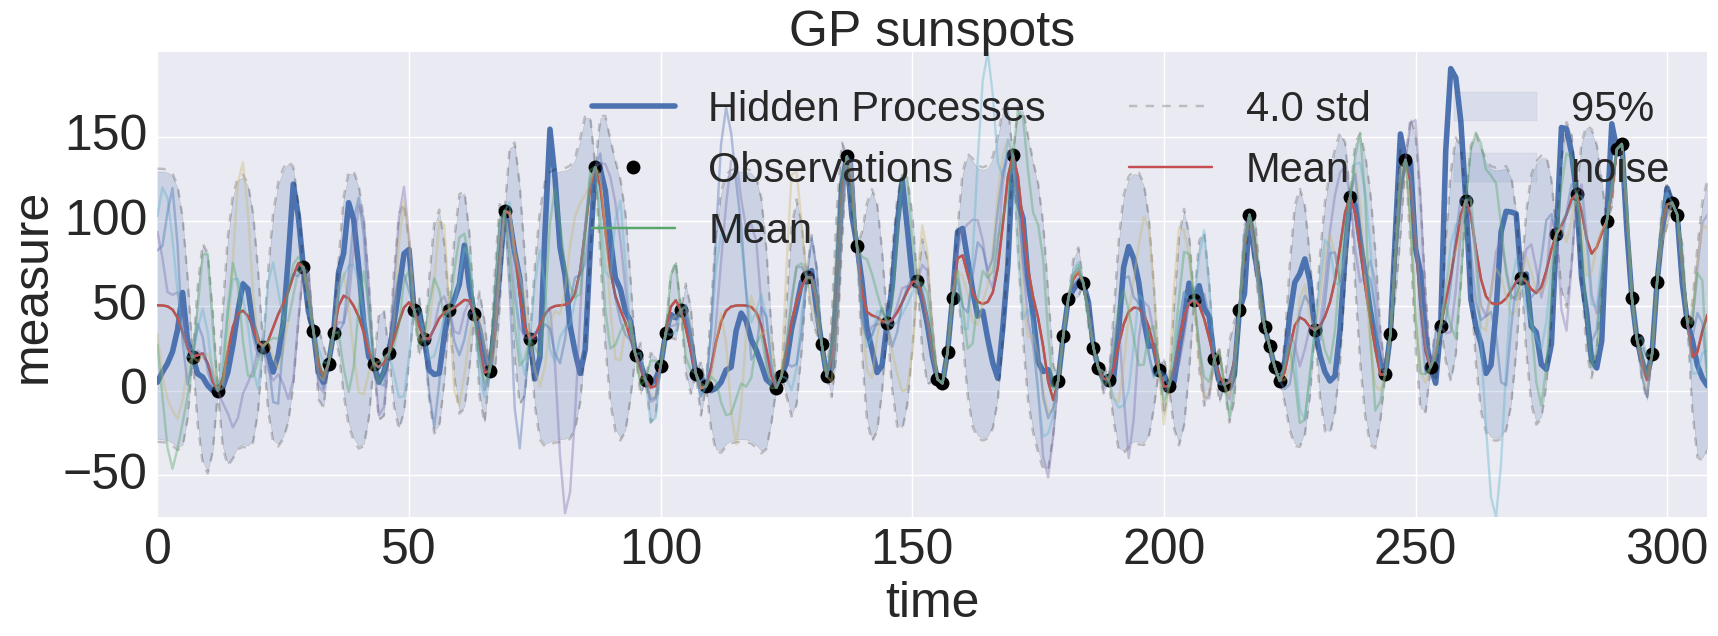

Space Dimensions:  (309, 1)
Definition OK
Compilation OK
Starting function value (-logp): 398.238

start_bfgs
         Current function value: 362.598785
         Iterations: 18
         Function evaluations: 85
         Gradient evaluations: 80

start_powell
Optimization terminated successfully.
         Current function value: 373.965057
         Iterations: 10
         Function evaluations: 826
Saved model models/sunspots_TGP.g3


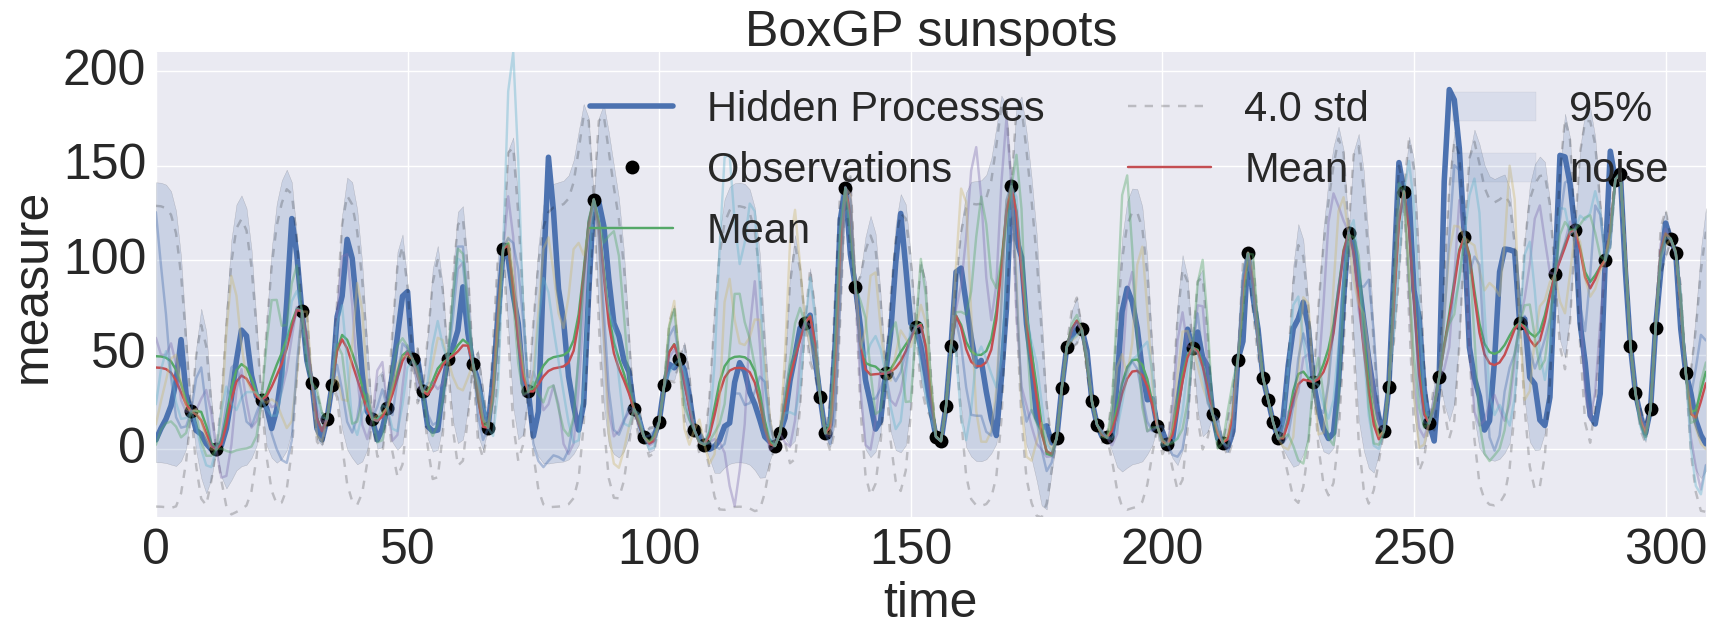

In [7]:
# Sunsets
name_data = 'sunspots'
x, y = g3.load_sunspots()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.25)
test_gp()
test_tgp()

# Hydrologic Series: Maule

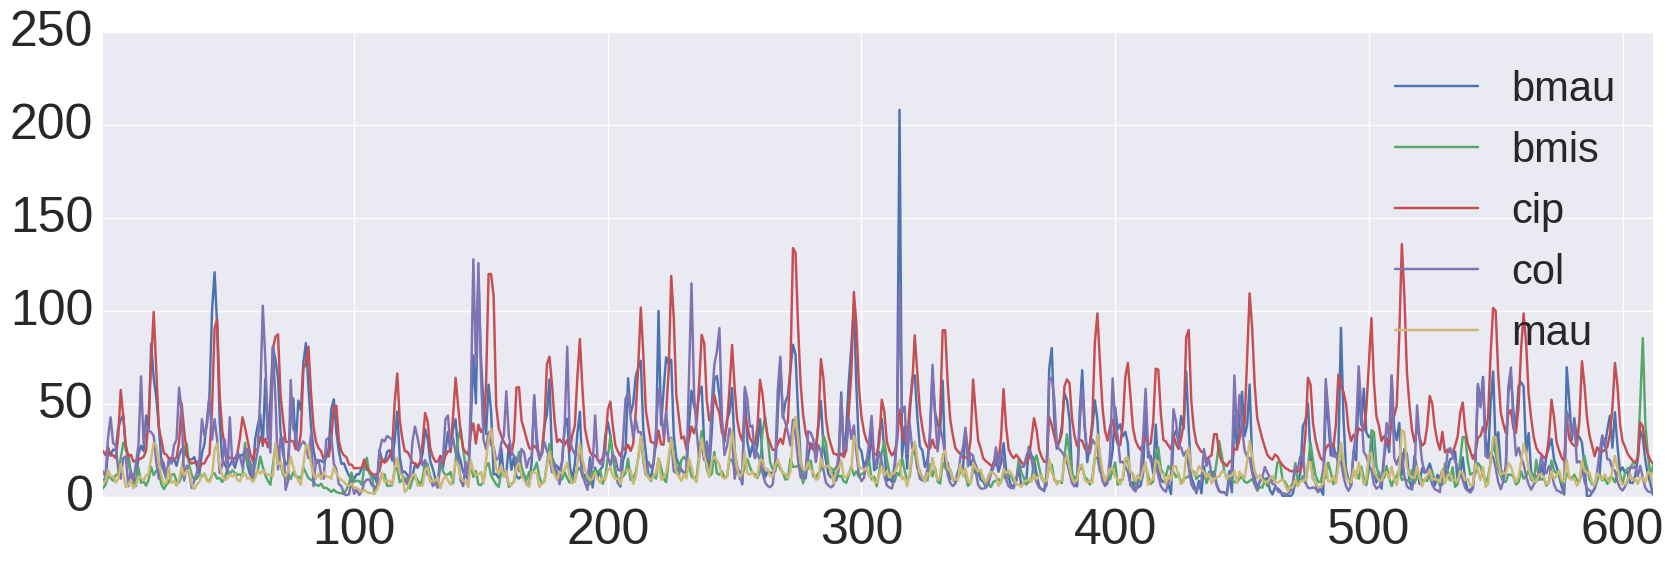

In [8]:
r1=np.exp(pd.read_csv('data/logbmau.csv',names=['bmau'],dtype=np.float32,skiprows=1))
r2=np.exp(pd.read_csv('data/logbmis.csv',names=['bmis'],dtype=np.float32,skiprows=1))
r3=np.exp(pd.read_csv('data/logcip.csv',names=['cip'],dtype=np.float32,skiprows=1))
r4=np.exp(pd.read_csv('data/logcol.csv',names=['col'],dtype=np.float32,skiprows=1))
r5=np.exp(pd.read_csv('data/logmau.csv',names=['mau'],dtype=np.float32,skiprows=1))
R=pd.concat([r1,r2,r3,r4,r5],axis=1)
R.plot()

Total: 612 | Obs: 91 (14.869281045751634%)
Space Dimensions:  (612, 1)
Definition OK
Compilation OK
Starting function value (-logp): 411.447

start_bfgs
         Current function value: 402.996521
         Iterations: 11
         Function evaluations: 87
         Gradient evaluations: 75

start_powell
Optimization terminated successfully.
         Current function value: 402.996613
         Iterations: 3
         Function evaluations: 158
Saved model models/bmau_GP.g3


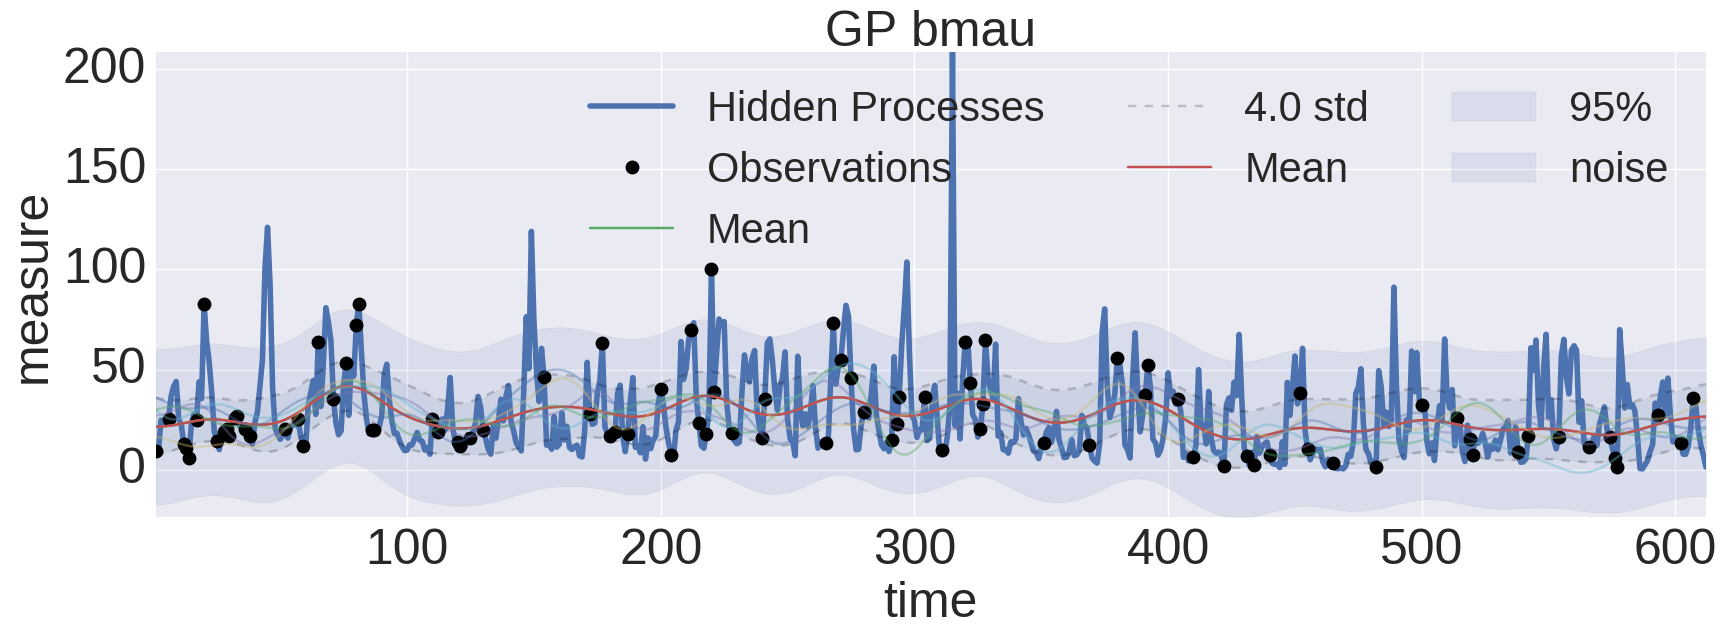

Space Dimensions:  (612, 1)
Definition OK
Compilation OK
Starting function value (-logp): 411.435

start_bfgs
         Current function value: 377.449219
         Iterations: 23
         Function evaluations: 75
         Gradient evaluations: 71

start_powell
Optimization terminated successfully.
         Current function value: 377.013489
         Iterations: 19
         Function evaluations: 1557
Saved model models/bmau_TGP.g3


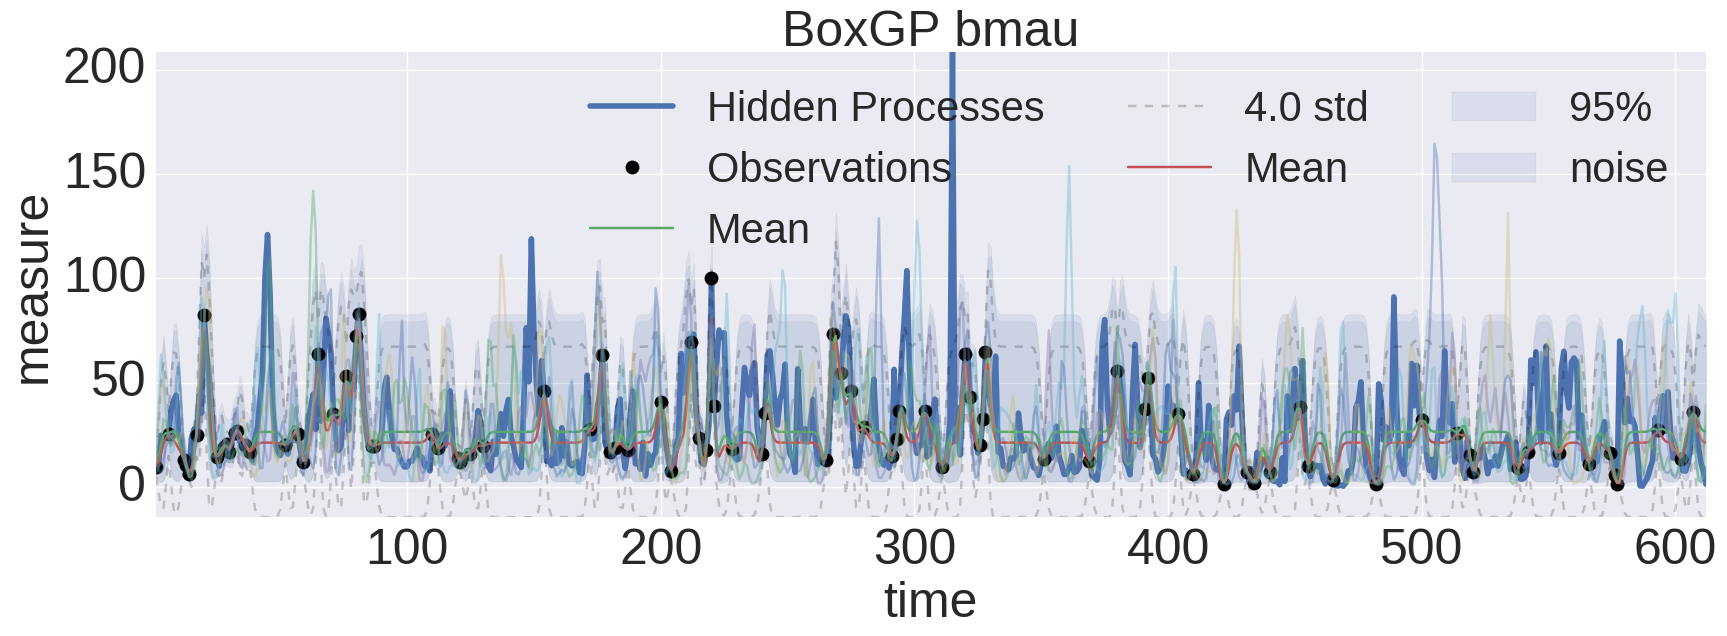

In [9]:
#Choose
r = r1
x, y, name_data = r.index.values, r.values[:,0], r.columns[0]
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.15)
test_gp()
test_tgp()

Total: 612 | Obs: 91 (14.869281045751634%)
Space Dimensions:  (612, 1)
Definition OK
Compilation OK
Starting function value (-logp): 415.265

start_bfgs
         Current function value: 405.065979
         Iterations: 14
         Function evaluations: 95
         Gradient evaluations: 83

start_powell
Optimization terminated successfully.
         Current function value: 405.068237
         Iterations: 5
         Function evaluations: 325
Saved model models/cip_GP.g3


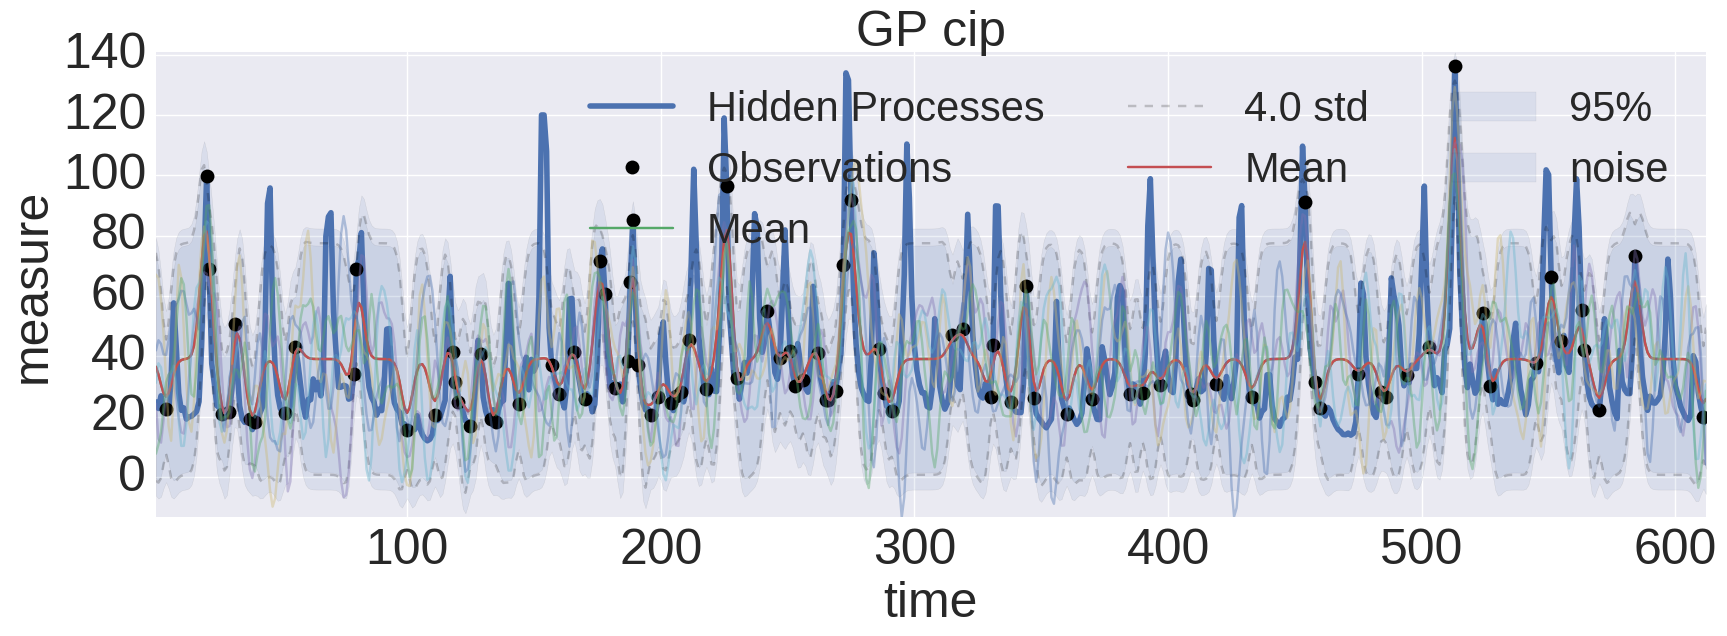

Space Dimensions:  (612, 1)
Definition OK
Compilation OK
Starting function value (-logp): 420.409

start_bfgs
         Current function value: 366.591309
         Iterations: 79
         Function evaluations: 157
         Gradient evaluations: 145

start_powell
Optimization terminated successfully.
         Current function value: 375.791382
         Iterations: 22
         Function evaluations: 2042
Saved model models/cip_TGP.g3


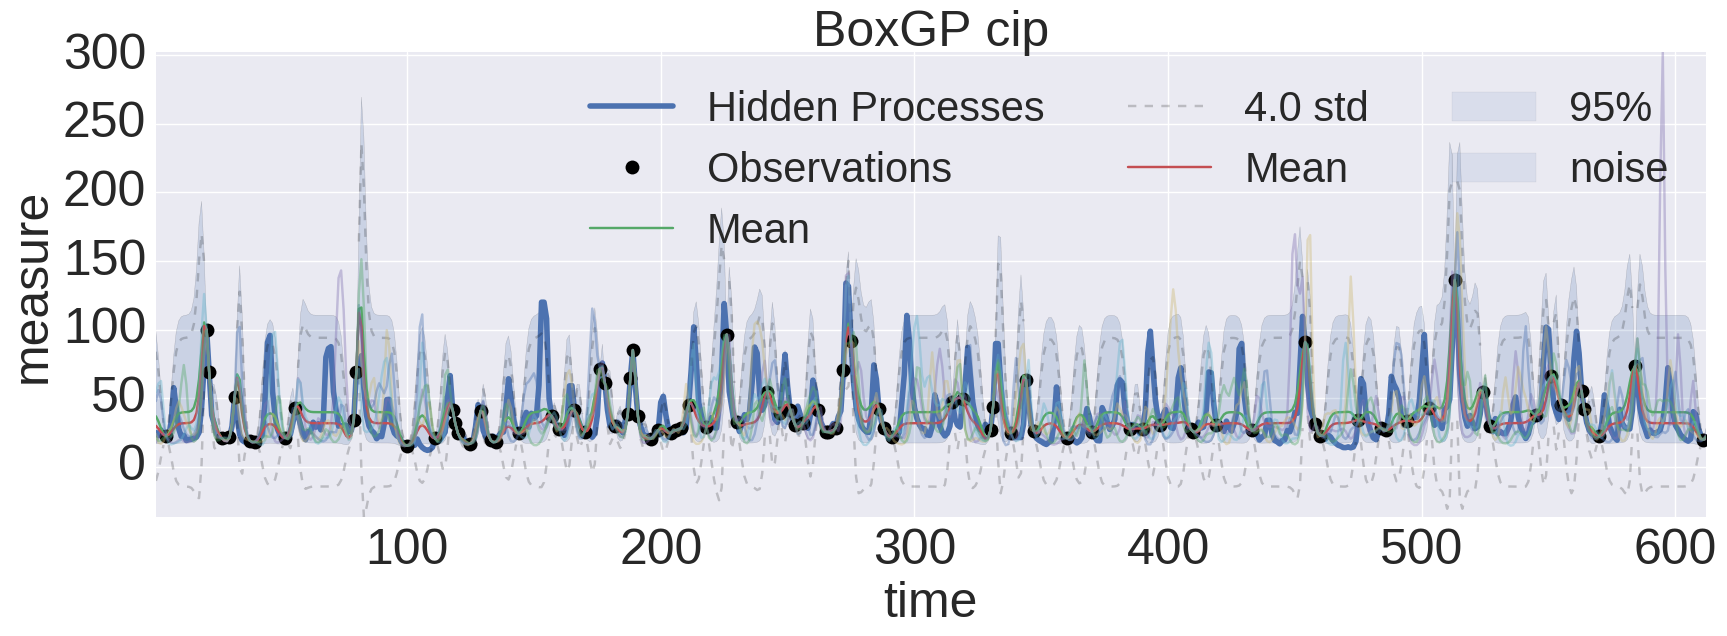

In [10]:
#Choose
r = r3
x, y, name_data = r.index.values, r.values[:,0], r.columns[0]
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.15)
test_gp()
test_tgp()

Total: 612 | Obs: 122 (19.934640522875817%)
Space Dimensions:  (612, 1)
Definition OK
Compilation OK
Starting function value (-logp): 402.794

start_bfgs
         Current function value: 392.002075
         Iterations: 11
         Function evaluations: 74
         Gradient evaluations: 62

start_powell
Optimization terminated successfully.
         Current function value: 392.002441
         Iterations: 4
         Function evaluations: 255
Saved model models/mau_GP.g3


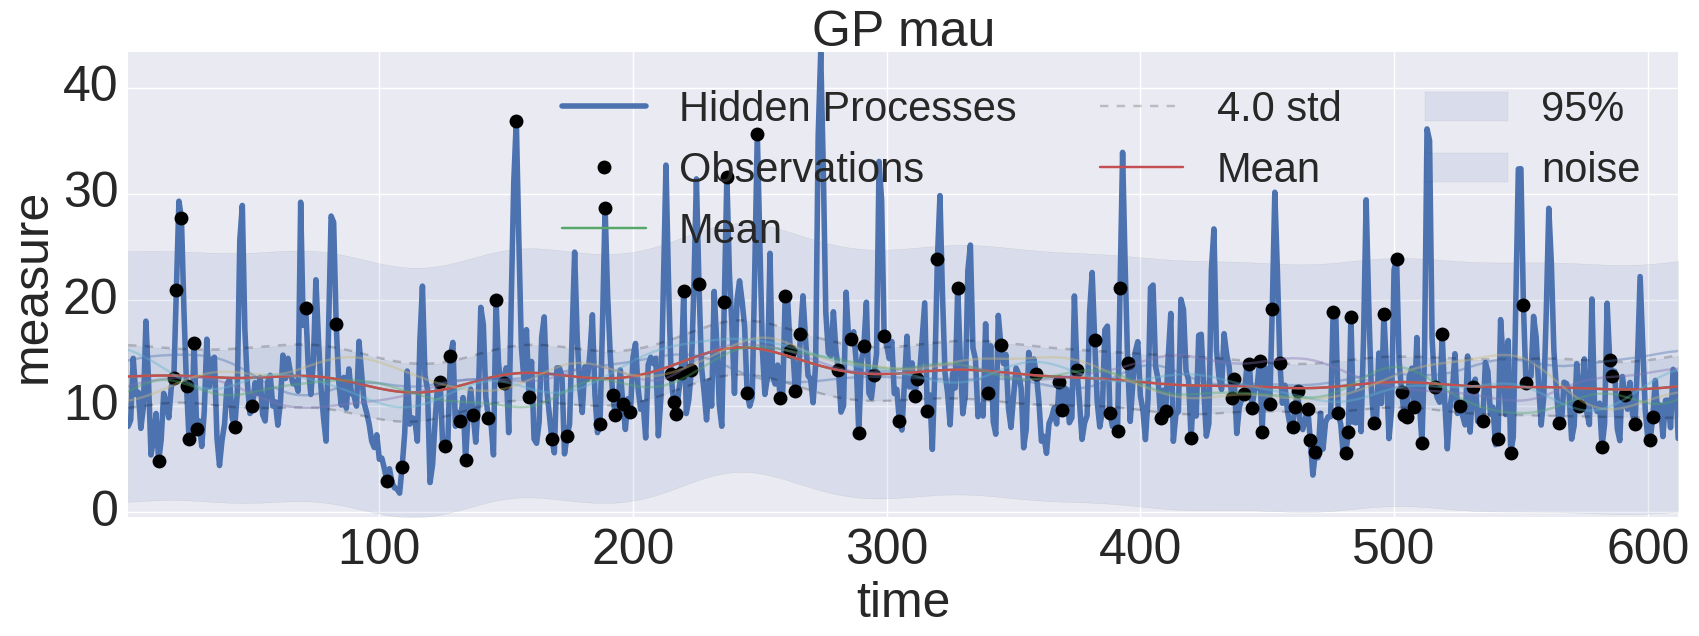

Space Dimensions:  (612, 1)
Definition OK
Compilation OK
Starting function value (-logp): 403.986

start_bfgs
         Current function value: 368.844055
         Iterations: 65
         Function evaluations: 156
         Gradient evaluations: 146

start_powell
Optimization terminated successfully.
         Current function value: 381.257294
         Iterations: 16
         Function evaluations: 1368
Saved model models/mau_TGP.g3


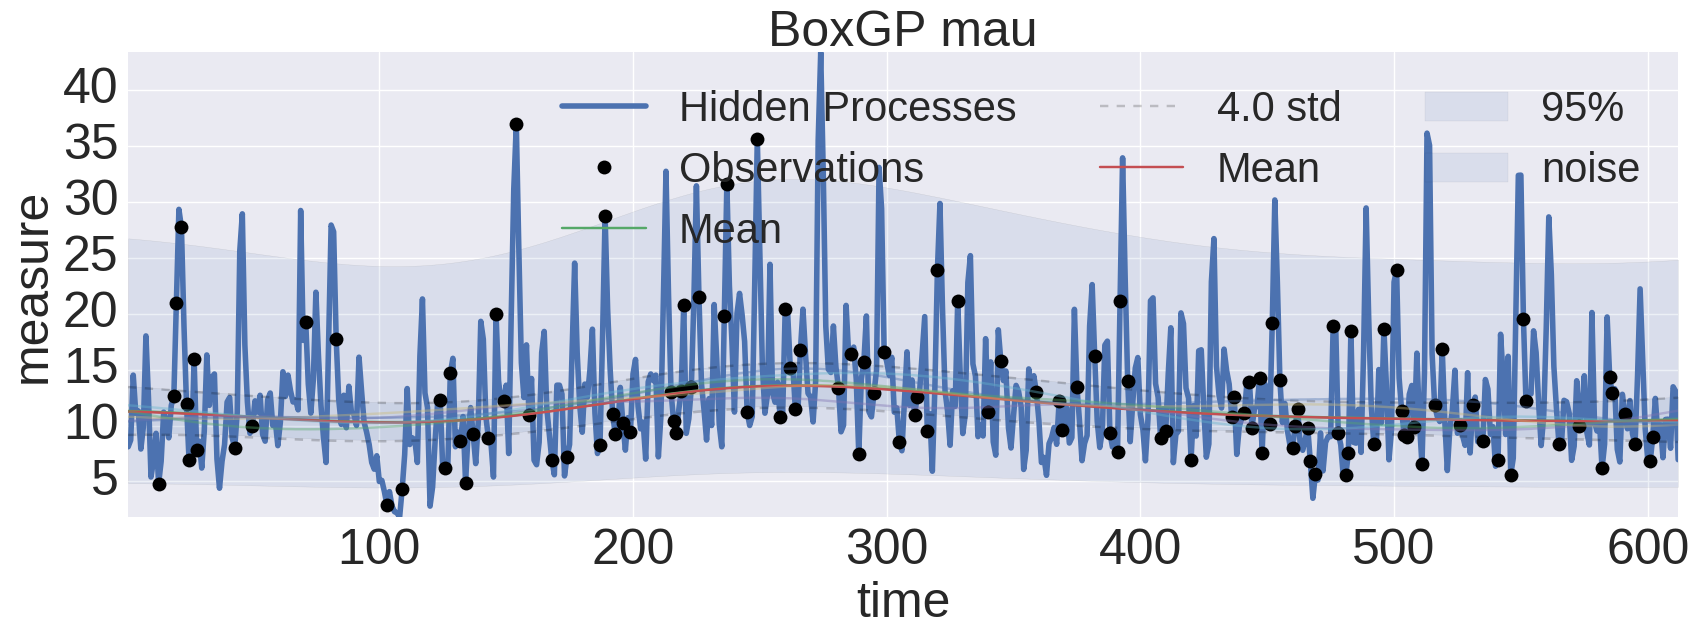

In [11]:
#Choose
r = r5
x, y, name_data = r.index.values, r.values[:,0], r.columns[0]
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.20)
test_gp()
test_tgp()

# Atmospheric Serie: Mauna Loa C02

+-------+-------------------+
| co2   | R Documentation   |
+-------+-------------------+

Mauna Loa Atmospheric CO2 Concentration
---------------------------------------

Description
~~~~~~~~~~~

Atmospheric concentrations of CO\ *2* are expressed in parts per million
(ppm) and reported in the preliminary 1997 SIO manometric mole fraction
scale.

Usage
~~~~~

::

    co2

Format
~~~~~~

A time series of 468 observations; monthly from 1959 to 1997.

Details
~~~~~~~

The values for February, March and April of 1964 were missing and have
been obtained by interpolating linearly between the values for January
and May of 1964.

Source
~~~~~~

Keeling, C. D. and Whorf, T. P., Scripps Institution of Oceanography
(SIO), University of California, La Jolla, California USA 92093-0220.

`ftp://cdiac.esd.ornl.gov/pub/maunaloa-co2/maunaloa.co2 <ftp://cdiac.esd.ornl.gov/pub/maunaloa-co2/maunaloa.co2>`__.

References
~~~~~~~~~~

Cleveland, W. S. (1993) *Visualizing Data*. New Jersey: Summit Press.

Ex

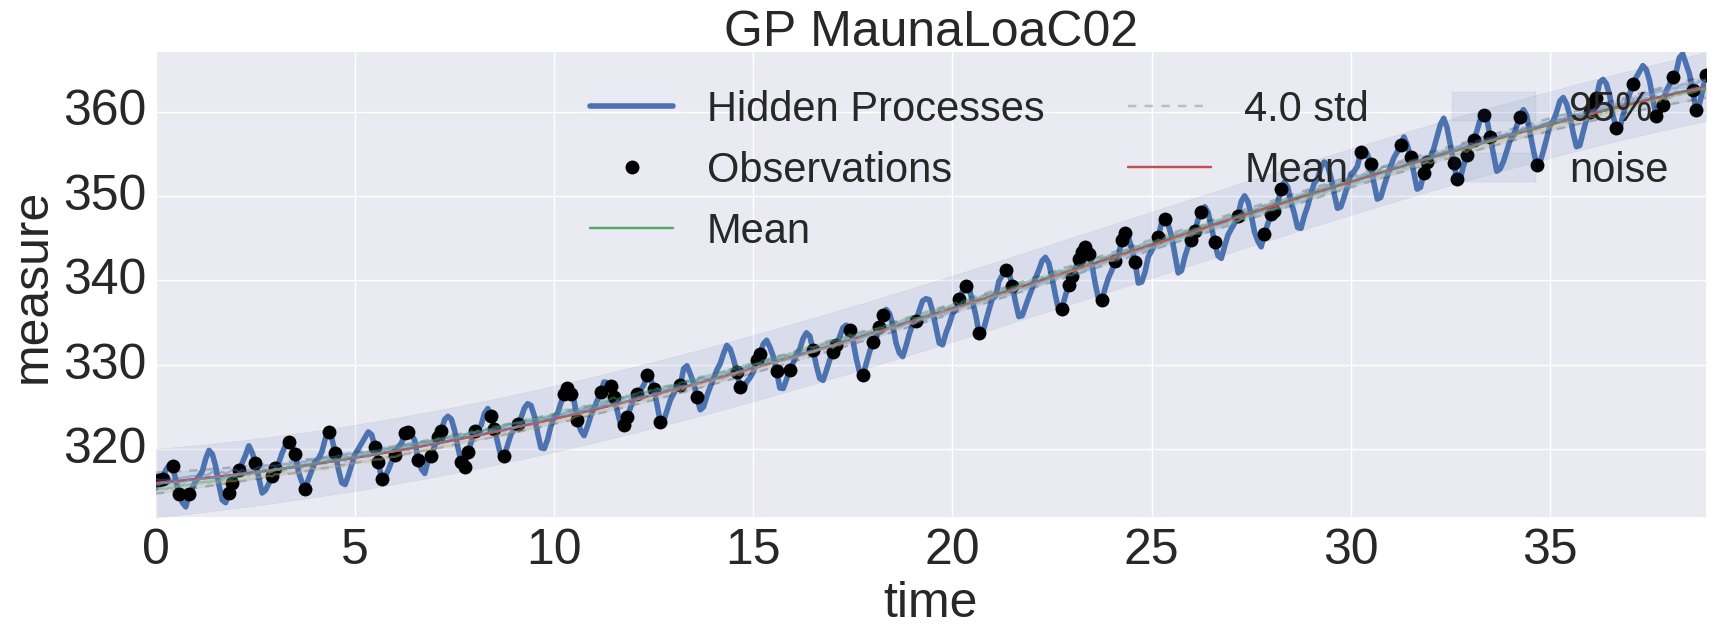

Space Dimensions:  (468, 1)
Definition OK
Compilation OK
Starting function value (-logp): 6962.18

start_bfgs
         Current function value: 266.765839
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 73

start_powell
Optimization terminated successfully.
         Current function value: 329.455414
         Iterations: 5
         Function evaluations: 537
Saved model models/MaunaLoaC02_TGP.g3


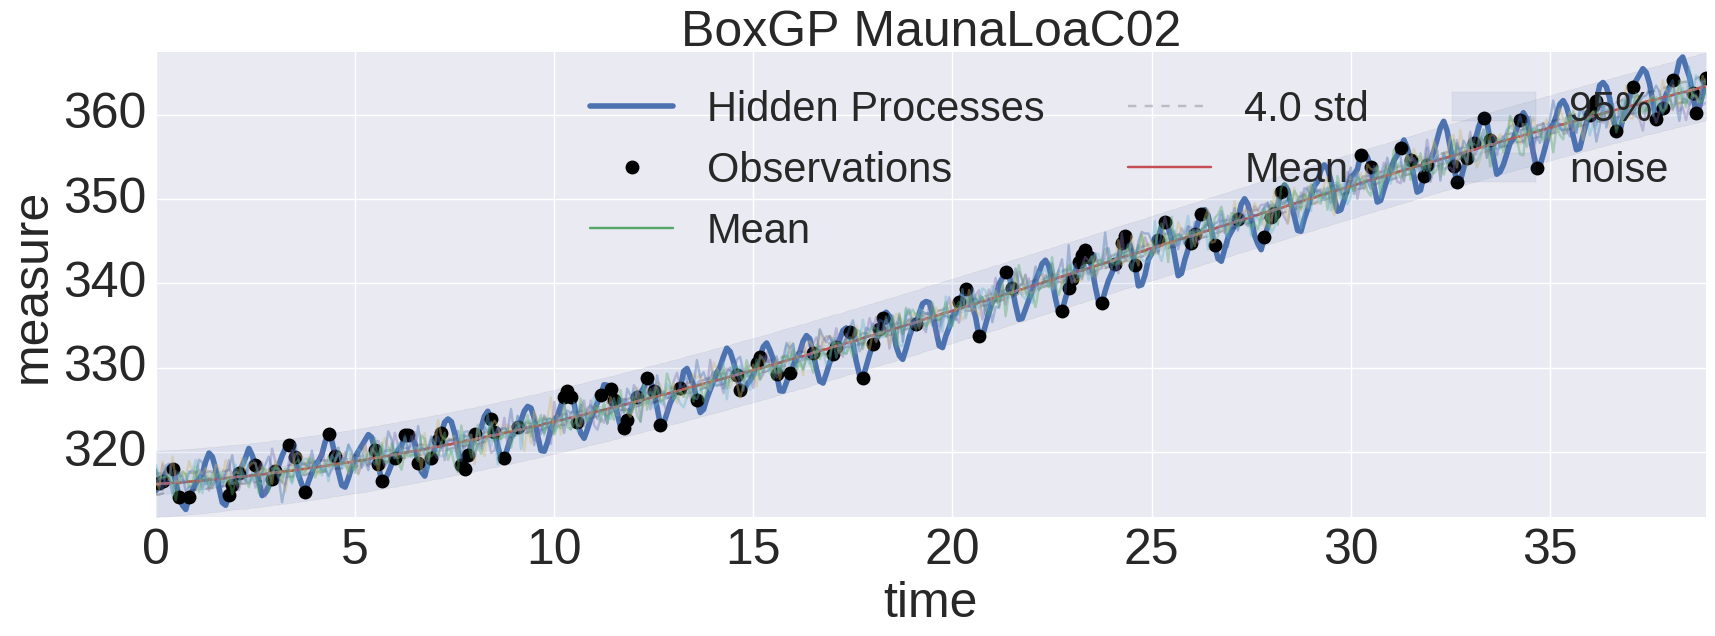

In [12]:
# C02 Concentration
name_data = 'MaunaLoaC02'
x, y = g3.load_co2()
x = x-x[0]
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.25)
test_gp()
test_tgp()